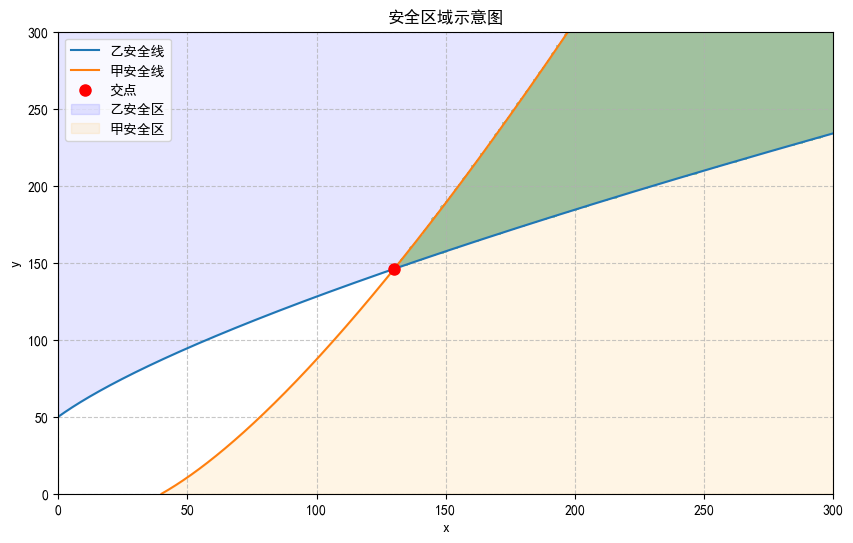

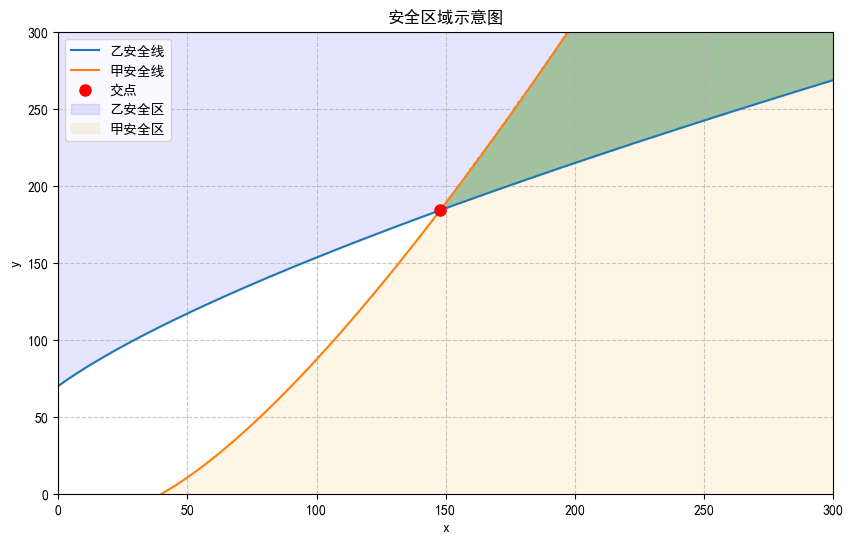

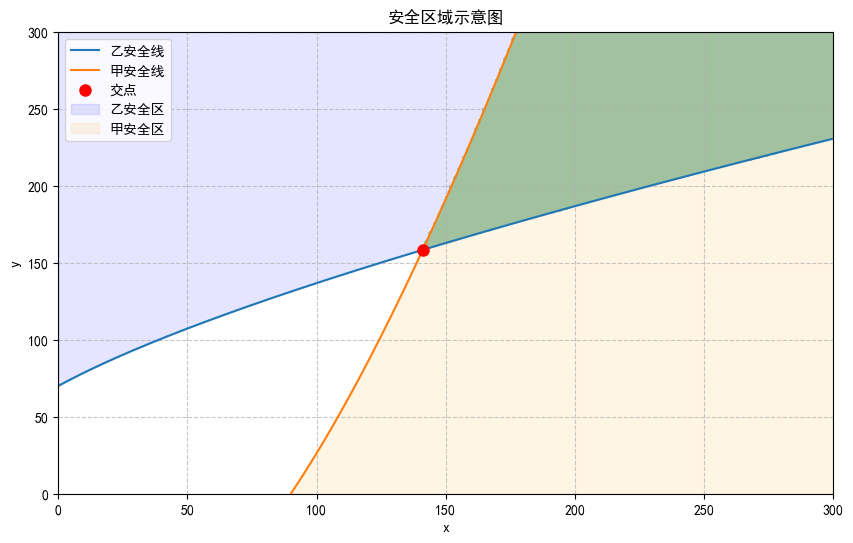

In [ ]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy import interpolate

# 设置字体以支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

def y_x(y0, s, y):
    return -(y * np.log(y)) / np.log(s) + (np.log(y0) / np.log(s)) * y

def x_y(x0, s, x):
    return -(x * np.log(x)) / np.log(s) + (np.log(x0) / np.log(s)) * x

def equations(p, y0, s_y, x0, s_x):
    x, y = p
    eq1 = x + (y * np.log(y)) / np.log(s_y) - (np.log(y0)/np.log(s_y)) * y
    eq2 = y + (x * np.log(x)) / np.log(s_x) - (np.log(x0)/np.log(s_x)) * x
    return (eq1, eq2)

y0 = 50
s_y = 0.3
x0 = 40
s_x = 0.35


def p(y0,s_y,x0,s_x,len):
    y1 = np.linspace(y0, len, 1000)
    x1 = y_x(y0, s_y, y1)
    x2 = np.linspace(x0, len, 1000)
    y2 = x_y(x0, s_x, x2)


    x_int, y_int = fsolve(equations, (200, 200), args=(y0, s_y, x0, s_x))  
    plt.figure(figsize=(10, 6))
    plt.plot(x1, y1, label='乙安全线')
    plt.plot(x2, y2, label='甲安全线')
    plt.plot(x_int, y_int, 'ro', markersize=8, label='交点')



    blue_y_interp = interpolate.interp1d(x1, y1, bounds_error=False, fill_value='extrapolate')
    orange_x_interp = interpolate.interp1d(y2, x2, bounds_error=False, fill_value='extrapolate')
    x_fill = np.linspace(0, len, len)
    plt.fill_between(x_fill, blue_y_interp(x_fill), len, color='blue', alpha=0.1, label='乙安全区')
    y_fill = np.linspace(0, len, len)
    plt.fill_betweenx(y_fill, orange_x_interp(y_fill), len, color='orange', alpha=0.1, label='甲安全区')

    x_grid, y_grid = np.meshgrid(np.linspace(x_int, len, 100), np.linspace(y_int, len, 100))
    cond1 = y_grid > blue_y_interp(x_grid)
    cond2 = x_grid > orange_x_interp(y_grid)
    plt.contourf(x_grid, y_grid, cond1 & cond2, levels=[0.5, 1.5], colors=['green'], alpha=0.3 )

    plt.title('安全区域示意图')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(0, len)
    plt.xlim(0, len)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

p(y0,s_y,x0,s_x,300)
p(y0+20,s_y,x0,s_x,300)
p(y0+20,s_y+0.1,x0+50,s_x+0.32,300)
    

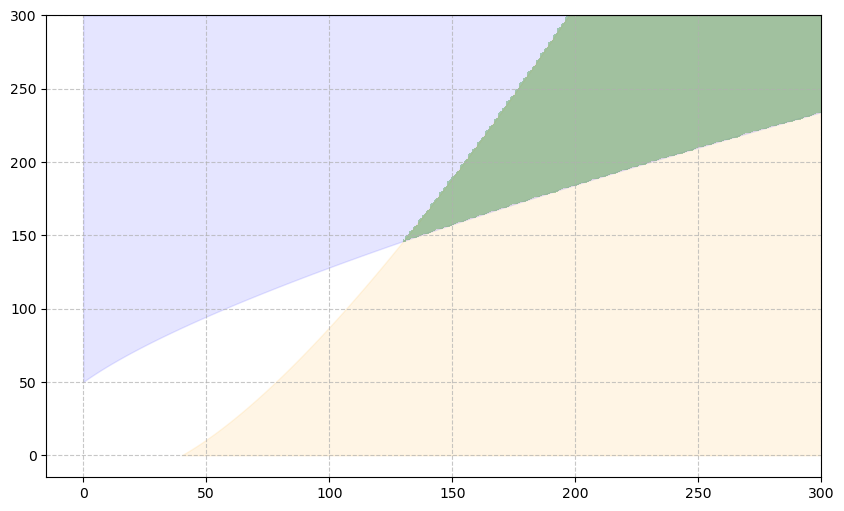

In [21]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy import interpolate



def y_x(y0, s, y):
    return -(y * np.log(y)) / np.log(s) + (np.log(y0) / np.log(s)) * y

def x_y(x0, s, x):
    return -(x * np.log(x)) / np.log(s) + (np.log(x0) / np.log(s)) * x

def equations(p, y0, s_y, x0, s_x):
    x, y = p
    eq1 = x + (y * np.log(y)) / np.log(s_y) - (np.log(y0)/np.log(s_y)) * y
    eq2 = y + (x * np.log(x)) / np.log(s_x) - (np.log(x0)/np.log(s_x)) * x
    return (eq1, eq2)


y0 = 50
s_y = 0.3
x0 = 40
s_x = 0.35

y1 = np.linspace(y0, 300, 1000)
x1 = y_x(y0, s_y, y1)
x2 = np.linspace(x0, 300, 1000)
y2 = x_y(x0, s_x, x2)


x_int, y_int = fsolve(equations, (200, 200), args=(y0, s_y, x0, s_x))  

blue_y_interp = interpolate.interp1d(x1, y1, bounds_error=False, fill_value='extrapolate')
orange_x_interp = interpolate.interp1d(y2, x2, bounds_error=False, fill_value='extrapolate')

x_fill = np.linspace(0, 300, 300)
y_fill = np.linspace(0, 300, 300)


x_grid, y_grid = np.meshgrid(np.linspace(x_int, 300, 100), np.linspace(y_int, 300, 100))
cond1 = y_grid > blue_y_interp(x_grid)
cond2 = x_grid > orange_x_interp(y_grid)
 

plt.figure(figsize=(10, 6))
plt.fill_between(x_fill, blue_y_interp(x_fill), 300, color='blue', alpha=0.1, label='乙安全区')
plt.fill_betweenx(y_fill, orange_x_interp(y_fill), 300, color='orange', alpha=0.1, label='甲安全区')
plt.contourf(x_grid, y_grid, cond1 & cond2, levels=[0.5, 1.5], colors=['green'], alpha=0.3 )
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()